In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [47]:
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  int64 
 1   Gender               30641 non-null  object
 2   EthnicGroup          28801 non-null  object
 3   ParentEduc           28796 non-null  object
 4   LunchType            30641 non-null  object
 5   TestPrep             28811 non-null  object
 6   ParentMaritalStatus  29451 non-null  object
 7   PracticeSport        30010 non-null  object
 8   IsFirstChild         29737 non-null  object
 9   NrSiblings           30641 non-null  object
 10  TransportMeans       27507 non-null  object
 11  WklyStudyHours       29686 non-null  object
 12  MathScore            30641 non-null  int64 
 13  ReadingScore         30641 non-null  int64 
 14  WritingScore         30641 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 3.5+ MB


In [41]:
#Drop the unnamed column 
df.drop('Unnamed: 0', axis = 1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,<class 'int'>,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,<class 'int'>,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,<class 'int'>,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,<class 'int'>,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,<class 'int'>,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,<class 'int'>,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,<class 'int'>,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,<class 'int'>,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,<class 'int'>,school_bus,5 - 10,82,90,93


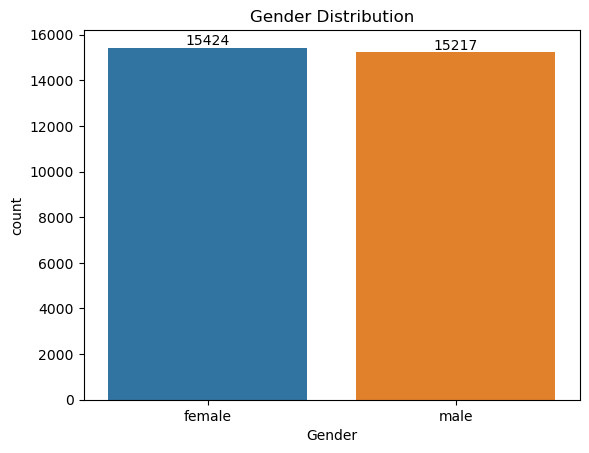

In [98]:
#Gender Distribution 
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Gender Distribution')

We can see that there are more number of female students compared to male students


Text(0.5, 1.0, 'Relationship between student score and parent education')

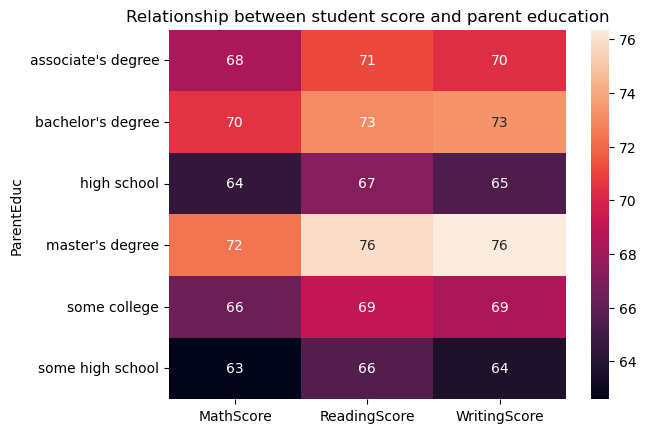

In [63]:
#Parent qualifiation on the scores of the student
pqscore = df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(pqscore, annot = True)
plt.title('Relationship between student score and parent education')

The above analysis tells us that there is strong relationship between student scores and their parents education

Text(0.5, 1.0, 'Relationship between student score and parent marital status')

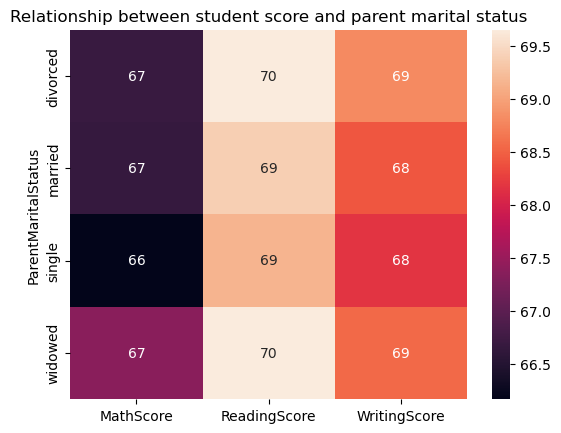

In [62]:
#Parent qualifiation on the scores of the student
pqscore = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(pqscore, annot = True)
plt.title('Relationship between student score and parent marital status')

The above analysis tells us that there is no significant relationship between student scores and the marital status of their parents

<Axes: xlabel='MathScore'>

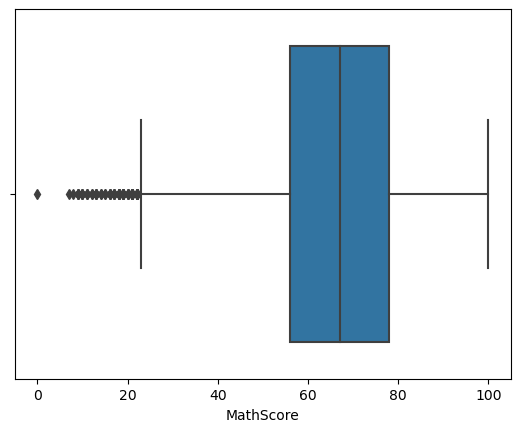

In [66]:
#Checking the outlier scores in different subjects
sns.boxplot(x = 'MathScore', data = df)

Math score has an outlier where a student has scored 0 in the subject

<Axes: xlabel='ReadingScore'>

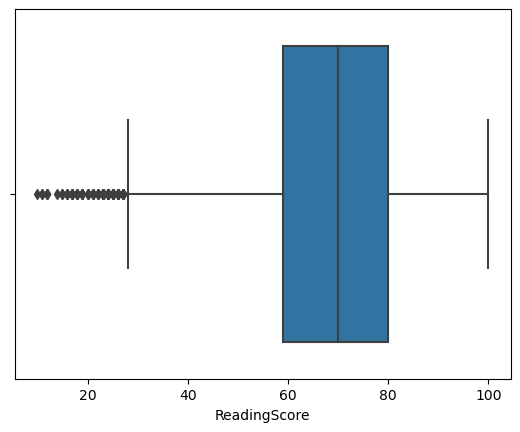

In [68]:
sns.boxplot(x = 'ReadingScore', data = df)

We can see from the plot that there are significant number of outliers falling in the lower end of the plot

<Axes: xlabel='WritingScore'>

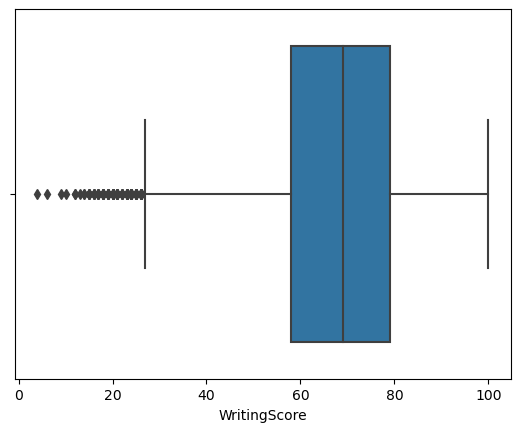

In [70]:
sns.boxplot(x = 'WritingScore', data = df)

similarly We can see from the plot that there are significant number of outliers in the writing score
falling in the lower end of the plot

In [74]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [82]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()



<function matplotlib.pyplot.show(close=None, block=None)>

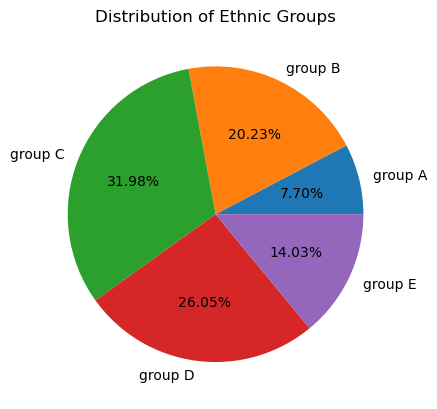

In [97]:
mlist = groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']
l = ['group A','group B','group C', 'group D', 'group E'] 
plt.title('Distribution of Ethnic Groups')
plt.pie(mlist, labels = l, autopct = '%1.2f%%')
plt.show
